In [1]:
import json 
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


obj_dict ={}

#getting all json file into a list to iterate
os.chdir(r"C:\Users\clair\OneDrive\Documents\IS434\s3browser\chewwwie_pics")


extension = 'json'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
combined_json = pd.concat([pd.read_json(f) for f in all_filenames ])

# print(all_filenames)
# print("***")
# print(combined_json)

# print(combined_json['Name'])
    

# for jsonfile in all_filenames : 
#     #open the file
#     with open(jsonfile+'.json') as f:
#         data = json.load(f)
#         print(data)


for object in combined_json['Name'] :
    #object is a dictionary
#     print(object['Name'])
    object = str(object)
    #check if in dictionary else update key-value pair
    if object in obj_dict :
        obj_dict[object] += 1
    else :
        obj_dict[object] = 1

In [3]:
list_to_remove = ['Person', 'Human', 'Face', 'Skin', 'Head', 'Hair', 'Mammal', 'Canine', 'Woman', 'Female', 'Girl','Clothing','Apparel','Food','Meal','Dish','Plant','Text']


for word in list_to_remove: 
    for key in obj_dict.keys():
      if key == word:
        del obj_dict[key]
        break


In [4]:
obj_dict = {key:val for key, val in obj_dict.items() if val > 9}

In [5]:
print(dict(sorted(obj_dict.items(), key=lambda item: item[1], reverse = True)))

{'Bread': 70, 'Sweets': 63, 'Dessert': 61, 'Confectionery': 59, 'Pasta': 49, 'Bowl': 49, 'Burger': 44, 'Cream': 40, 'Creme': 37, 'Noodle': 36, 'Outdoors': 34, 'Furniture': 31, 'Produce': 27, 'Cake': 25, 'Animal': 25, 'Pottery': 25, 'Beverage': 24, 'Indoors': 21, 'Restaurant': 21, 'Advertisement': 21, 'Poster': 21, 'Vegetable': 21, 'Fashion': 20, 'Egg': 20, 'Wood': 19, 'Shoe': 19, 'Drink': 19, 'Evening Dress': 18, 'Nature': 18, 'Footwear': 18, 'Ice Cream': 18, 'Icing': 18, 'Building': 16, 'Interior Design': 16, 'Gown': 16, 'Coffee Cup': 16, 'Water': 16, 'Sea Life': 16, 'Hot Dog': 16, 'Cup': 15, 'Flyer': 15, 'Paper': 15, 'Brochure': 15, 'Cutlery': 15, 'Robe': 14, 'Flower': 14, 'Curry': 14, 'Lunch': 13, 'Vermicelli': 13, 'Bun': 13, 'Platter': 13, 'Stew': 13, 'Table': 12, 'Cafeteria': 12, 'Art': 12, 'Alcohol': 12, 'Shop': 11, 'Flooring': 11, 'Floor': 11, 'Soup Bowl': 11, 'Accessories': 11, 'Dinner': 11, 'Spaghetti': 11, 'Room': 10, 'Sleeve': 10, 'Hardwood': 10, 'Seafood': 10, 'Pizza': 10, 

In [7]:
sorted_dict = dict(sorted(obj_dict.items(), key=lambda item: item[1], reverse = True))

In [8]:
sorted_dict

{'Dessert': 61,
 'Noodle': 61,
 'Bread': 60,
 'Pasta': 59,
 'Confectionery': 59,
 'Sweets': 58,
 'Bowl': 49,
 'Burger': 44,
 'Cream': 40,
 'Soba': 40,
 'Creme': 37,
 'Outdoors': 34,
 'Furniture': 31,
 'Produce': 27,
 'Cake': 25,
 'Animal': 25,
 'Pottery': 25,
 'Beverage': 24,
 'Indoors': 21,
 'Restaurant': 21,
 'Advertisement': 21,
 'Poster': 21,
 'Vegetable': 21,
 'Fashion': 20,
 'Egg': 20,
 'Wood': 19,
 'Shoe': 19,
 'Drink': 19,
 'Evening Dress': 18,
 'Nature': 18,
 'Footwear': 18,
 'Ice Cream': 18,
 'Icing': 18,
 'Building': 16,
 'Interior Design': 16,
 'Gown': 16,
 'Coffee Cup': 16,
 'Water': 16,
 'Sea Life': 16,
 'Hot Dog': 16,
 'Cup': 15,
 'Flyer': 15,
 'Paper': 15,
 'Brochure': 15,
 'Cutlery': 15,
 'Robe': 14,
 'Flower': 14,
 'Curry': 14,
 'Lunch': 13,
 'Vermicelli': 13,
 'Bun': 13,
 'Platter': 13,
 'Stew': 13,
 'Table': 12,
 'Cafeteria': 12,
 'Art': 12,
 'Alcohol': 12,
 'Shop': 11,
 'Flooring': 11,
 'Floor': 11,
 'Soup Bowl': 11,
 'Accessories': 11,
 'Dinner': 11,
 'Spaghetti':

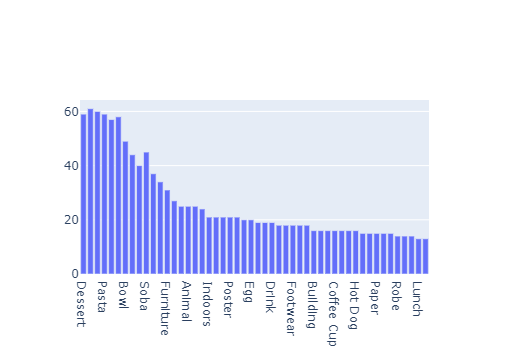

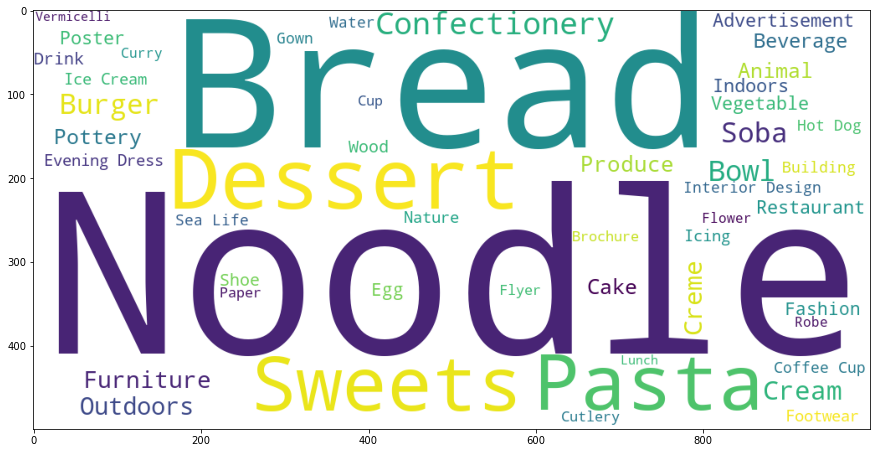

In [23]:
import itertools
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 500, background_color = "white").generate_from_frequencies(sorted_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

import plotly.graph_objects as go

sorted_dict = dict(itertools.islice(sorted_dict.items(), 50))

fig = go.Figure()
fig.add_trace(go.Bar(x=list(sorted_dict.keys()), y=list(sorted_dict.values())))
fig.show()